# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You thought that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
# import libraries
import numpy as np # Import Numpy for data statistical analysis 
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import pandas as pd # Import Pandas for data manipulation using dataframes

In [2]:
## Read the data from the original file

In [3]:
retirement_data = pd.read_csv('Bank_Customer_retirement.csv')

In [4]:
retirement_data

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [5]:
retirement_data.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

# STEP #3: VISUALIZING THE DATA

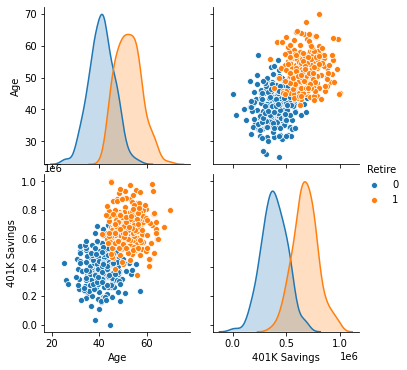

In [6]:
sns.pairplot(retirement_data, hue = 'Retire', vars=['Age', '401K Savings'])

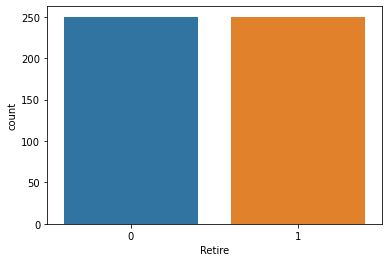

In [7]:
sns.countplot(x = 'Retire', data = retirement_data )

## Possible to use other plots for data visualization as well

# STEP #4: MODEL TRAINING 

In [8]:
retirement_data = retirement_data.drop(['Customer ID'], axis = 1)

In [9]:
retirement_data
# Let's drop the target label coloumns


,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [10]:
X = retirement_data.drop(['Retire'], axis =1)

In [11]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [12]:
y = retirement_data['Retire']

In [13]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

## dividing the data into training and testing data 
## changing the test_size will change the accuracy of the model 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [15]:
X_test.shape

(100, 2)

In [16]:
X_train.shape

(400, 2)

In [17]:
y_test.shape

(100,)

In [18]:
y_train.shape

(400,)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
svc_model = SVC()

In [21]:
svc_model.fit(X_train, y_train) 

SVC()

# STEP #5: EVALUATING THE MODEL

In [22]:
y_predict = svc_model.predict(X_test)

In [23]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [24]:
cm = confusion_matrix(y_test, y_predict)

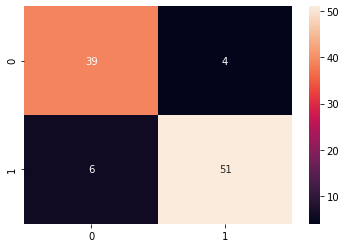

In [25]:
sns.heatmap(cm, annot = True)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# STEP #6: IMPROVING THE MODEL

In [27]:
x_train_min = X_train.min()

In [28]:
x_train_min

Age             25.0
401K Savings    10.0
dtype: float64

In [29]:
range_train = X_train.max() - x_train_min

In [30]:
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [31]:
x_train_scaled = (X_train - x_train_min) / range_train

In [32]:
x_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


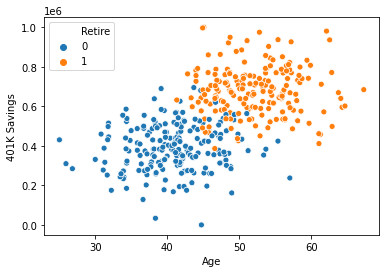

In [33]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'] , hue = retirement_data['Retire'])

## Now you can see normalized data

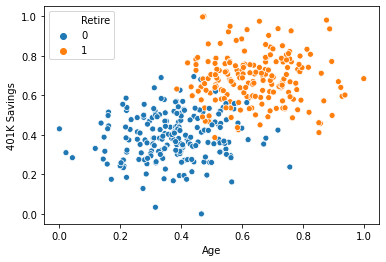

In [34]:
sns.scatterplot(x = x_train_scaled['Age'], y = x_train_scaled['401K Savings'] , hue = retirement_data['Retire'])

## Now, for the test data Normalization

In [35]:
x_test_min = X_test.min()

In [36]:
x_test_min

Age                 31.787663
401K Savings    109281.634500
dtype: float64

In [37]:
range_test = X_test.max() - x_test_min

In [38]:
range_test

Age                 38.212337
401K Savings    778603.066500
dtype: float64

In [39]:
x_test_scaled = (X_test - x_test_min) / range_test

In [40]:
x_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
...,...,...
145,0.633436,0.635622
234,0.612141,0.525418
382,0.444550,0.850610
141,0.538401,0.412874


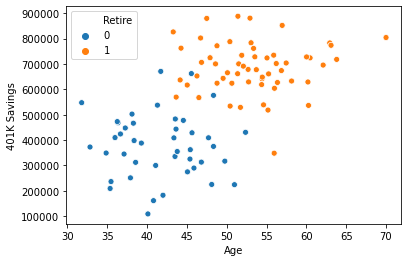

In [41]:
sns.scatterplot(x = X_test['Age'], y = X_test['401K Savings'], hue = y_test)

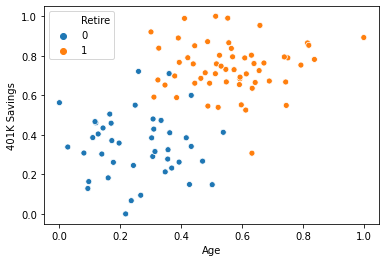

In [42]:
sns.scatterplot(x = x_test_scaled['Age'], y = x_test_scaled['401K Savings'], hue = y_test)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
svc_model = SVC()

In [45]:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [46]:
y_predict = svc_model.predict(x_test_scaled)

In [47]:
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, y_predict)

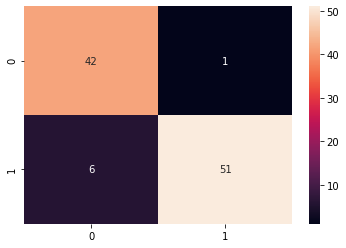

In [49]:
sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



# IMPROVING THE MODEL - PART 2

## This is part of the Generalization intuition
## C-parameter and Gamma parameter are used for building generalized / overfitted model
## For more information, you can search about these parameters and how to use a grid to find the best value for higher model accuracy

In [51]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [54]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.525, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.525, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.537, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [55]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [56]:
grid_predict = grid.predict(x_test_scaled)

In [57]:
cm = confusion_matrix(y_test, grid_predict)

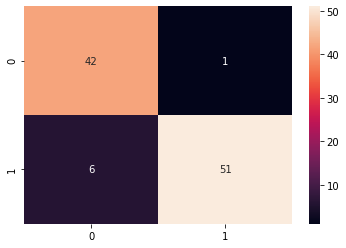

In [58]:
sns.heatmap(cm, annot=True)

In [59]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!